In [69]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#for image processing(python image processing)
from queue import Queue
#optional package

In [70]:
image=Image.open('image.jpg')
grayscale_image=image.convert('L')
#in DBSCAN colors don't matter, so we can 
#simplify the process by turning the image into
#mode 'L' which means grayscale(black and white)

In [71]:
image_array=np.array(grayscale_image)
#creating a 2D numpy array where each element 
#stores the intensity(how black or how white)
#of each pixel
height,width=image_array.shape
#image_array.shape returns a tuple 


In [72]:
data=[]
for x in range (width):
    for y in range (height):
        intensity = image_array[y,x]
        data.append([x,y,intensity])
#creating a list of pixel coordinates with
#intensity values
data=np.array(data)
#turning the data list into a np array
data

array([[  0,   0, 254],
       [  0,   1, 254],
       [  0,   2, 255],
       ...,
       [147, 158, 255],
       [147, 159, 255],
       [147, 160, 255]])

In [73]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        # Initialize the DBSCAN model with the given parameters.
        # eps: Maximum distance between two samples for them to be considered as in the same neighborhood.
        # min_samples: Minimum number of points required to form a dense region (cluster).
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None  # To store cluster labels for each data point

    def euclidean_distance(self, point1, point2):
        # Calculate the Euclidean distance(the one we have in coordinates!) between two points.
        # point1, point2: Points represented as numpy arrays
        return np.sqrt(np.sum((point1 - point2)**2))
        #sqrt((x1-x2)^2+(y1-y2)^2)  

    def fit(self, data):
        # Fit the DBSCAN model to the data
        # data: 2D array where each row represents a point with coordinates and intensity

        # Create spatial grid for indexing
        grid_size = int(np.ceil(self.eps)) + 1  # Determine the size of grid cells based on eps
        grid = {}  # Dictionary(remember c++ maps???) to store points in each grid cell

        # Populate the grid with points
        for point in data:
            x, y = point[:2]  # Extract x and y coordinates
            grid_x, grid_y = int(x // grid_size), int(y // grid_size)  # Determine the grid cell coordinates!
            if (grid_x, grid_y) not in grid:
                grid[(grid_x, grid_y)] = []  # Initialize list for new grid cells
            grid[(grid_x, grid_y)].append(point)  # Add the point to the corresponding grid cell

        labels = -1 * np.ones(data.shape[0], dtype=int)  # Initialize labels: -1 indicates unclassified points:(
        cluster_id = 0  # Initialize cluster ID counter
        total_points = data.shape[0]  # Total number of points in the dataset(used in counter) :)

        def get_neighbors(point):
            # Retrieve neighbors of a given point within eps distance
            x, y = point[:2]  # Extract x and y coordinates
            grid_x, grid_y = int(x // grid_size), int(y // grid_size)  # Determine the grid cell coordinates
            neighbors = []  # List to store neighbor points

            # Check neighboring grid cells
            for dx in range(-1, 2):  # Iterate over neighboring grid cells in x direction
                for dy in range(-1, 2):  # Iterate over neighboring grid cells in y direction
                    check_grid = grid.get((grid_x + dx, grid_y + dy), [])  # Get points from the neighboring grid cell
                    for neighbor in check_grid:
                        if self.euclidean_distance(point, neighbor) <= self.eps:
                            neighbors.append(neighbor)  # Add neighbor if it is within eps distance
            return neighbors  # Return the list of neighbors

        def expand_cluster(point_idx, neighbors):
            # Expand the cluster from a given core point and its neighbors
            labels[point_idx] = cluster_id  # Assign cluster ID to the core point
            i = 0
            while i < len(neighbors):
                neighbor = neighbors[i]  # Get the current neighbor point
                # Find the index of the neighbor point in the original data
                neighbor_idx = np.where(np.all(data == neighbor, axis=1))[0][0]

                if labels[neighbor_idx] == -1:
                    labels[neighbor_idx] = cluster_id  # Assign cluster ID to noise points
                elif labels[neighbor_idx] == 0:
                    labels[neighbor_idx] = cluster_id  # Assign cluster ID to unvisited points
                    new_neighbors = get_neighbors(neighbor)  # Get neighbors of the new point
                    if len(new_neighbors) >= self.min_samples:
                        neighbors.extend(new_neighbors)  # Add new neighbors to the list
                i += 1

        # Main loop to iterate over all data points
        for i, point in enumerate(data):
            if i % 100 == 0:  # Print progress every 100 points
                print(f"Processing point {i}/{total_points}")

            if labels[i] == -1:
                neighbors = get_neighbors(point)  # Find neighbors for the current point
                if len(neighbors) >= self.min_samples:
                    cluster_id += 1  # Increment cluster ID for a new cluster
                    expand_cluster(i, neighbors)  # Expand the cluster from the current point

        self.labels_ = labels  # Store the final cluster labels
        return self  # Return the DBSCAN object for  chaining!!!


In [74]:
dbscan=DBSCAN(eps=10,min_samples=3)
#instantiating the class
dbscan.fit(data)
#fitting the model on preprocessed image
labels=dbscan.labels_
#assigning labels into the variable
unique_labels=np.unique(labels)
#checking unique cluster IDs found
print(f"Number of clusters found(with noise):{len(unique_labels)}")


Processing point 0/23828
Processing point 100/23828
Processing point 200/23828
Processing point 300/23828
Processing point 400/23828
Processing point 500/23828
Processing point 600/23828
Processing point 700/23828
Processing point 800/23828
Processing point 900/23828
Processing point 1000/23828
Processing point 1100/23828
Processing point 1200/23828
Processing point 1300/23828
Processing point 1400/23828
Processing point 1500/23828
Processing point 1600/23828
Processing point 1700/23828
Processing point 1800/23828
Processing point 1900/23828
Processing point 2000/23828
Processing point 2100/23828
Processing point 2200/23828
Processing point 2300/23828
Processing point 2400/23828
Processing point 2500/23828
Processing point 2600/23828
Processing point 2700/23828
Processing point 2800/23828
Processing point 2900/23828
Processing point 3000/23828
Processing point 3100/23828
Processing point 3200/23828
Processing point 3300/23828
Processing point 3400/23828
Processing point 3500/23828
Proc

In [75]:
clustered_image=labels.reshape((height,width))
#reshape the 1D array back into a 2D array of dimenstions



In [ ]:
mean_intensities = {}
#a dictionary(C++ map)that stores mean intensity of each cluster
for label in unique_labels:
    #iterating over each cluster created
    if label != -1:  # Ignore noise points :)
        cluster_points = data[labels == label]
        #by using bolean mask, each neighbour will use the same color
        mean_intensity = np.mean(cluster_points[:, 2])
        #calculating the mean intensity of each cluster
        mean_intensities[label] = mean_intensity
        #storing it
# Recreate the image based on mean intensities of clusters
reconstructed_image = np.zeros_like(image_array)
#image comes back to life!
for i, label in enumerate(labels):
    x, y = data[i, :2]
    if label == -1:
        reconstructed_image[int(y), int(x)] = 0  # Assign noise points to black
    else:
        reconstructed_image[int(y), int(x)] = mean_intensities[label]


In [ ]:

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.colorbar()
plt.title('DBSCAN Reconstructed Image with Mean Intensities')
plt.show()

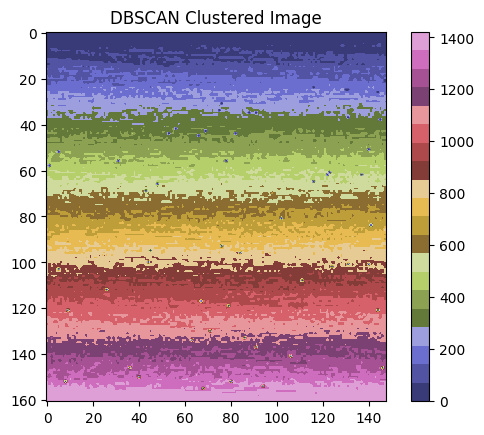

In [77]:
plt.imshow(clustered_image,cmap='tab20b')
#displaying an image from a 2D array and using a colormap
plt.colorbar()
#adds colorbar to the side of our plot, which shows 
#the mapping of colors to cluster labels and makes it easier to
#to identify which color corresponds to which cluster labels
plt.title('DBSCAN Clustered Image')
#adds title!
plt.show()
#render and display

#this will show us clusters and noise pixels(organizing the imageb)

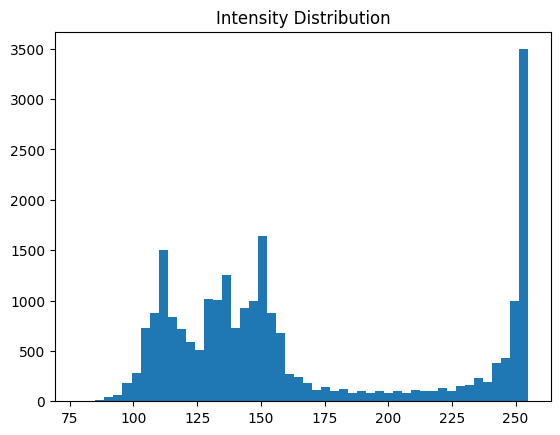

In [78]:
plt.hist(data[:, 2], bins=50)
plt.title('Intensity Distribution')
plt.show()

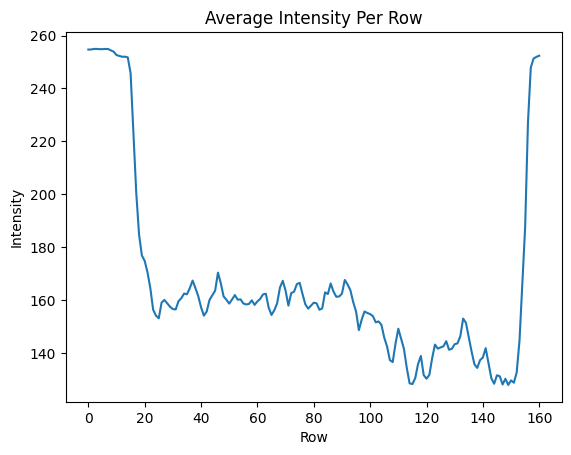

In [79]:
plt.plot(image_array.mean(axis=1))  # Average intensity per row
plt.title('Average Intensity Per Row')
plt.xlabel('Row')
plt.ylabel('Intensity')
plt.show()
